# Kommentar til Jørgen 

Vi får veldig lav score på training, test og prediction. 

Vi er litt usikre på *hvorfor* den blir så lav, men det har jo noe å gjøre med preprocessing. 

Ser du noen åpenbare feil vi har gjort i preprocessing som er grunnen til dette?


Vedr. preprocessing så er vi litt usikre på om vi skal:
   1. Gjøre om nullverdier til median for hver kolonne  **(se løsning 1**) 
      - Vi får  ca. 70k data points, med veldig lav score 
      - Kjappere plotting 


   2. Fjerne alle nullverdier helt fra datasettet **(se løsning 2**)  
      - Ca. 40k data points, med noe bedre score, men fortsatt urimelig lav 
      - Plotting tar mye lengre tid
      - Sale Price kommer ikke opp som data point i Correlation_matrix
      
      
   3. Bruke andre features i prediction som har lavere correlation score  

 
Setter pris på andre tips om du har det!

# INFO284 Machine Learning Eksamen, vår 2021
--- 
Kandiatnr.: 
* 
* 
* 
* 

---


## Beskrivelse av datasett 

Link: https://www.kaggle.com/new-york-city/nyc-property-sales

---    


- <b>Sale Price </b> er vår target feature.
- Før preprocesing tenker vi at følgende data points vil være logisk å bruke som <b> input features </b> for å predikere sale price:
    -  <b>Land Square Feeet / Gross Square Feet.</b> Altså størrelse på tomt. 
    -  <b>Year built. </b>  Er nyere eiendommer nødvendigvis dyrere enn eldre?
    -  <b>Zip Code / Borough. </b>  Har beliggenhet for en eiendom mye å si for prisen?

Vi vil også bruke korrelasjonsmatriser for å se hvilke features som passer best med sale price.


*** 
#### Vi har valgt følgende 5 modeller for prediksjoner av dette datasettet:
1. K-nærmeste naboer


2. Decision Trees


3. Linear Regression


4. Feedforward Neural Network 1


5. Feedforward Neural Network 2 
---

## Kommandoer for å importere nødvendige pakker 
* <span style='background:black'> <span style='color:white'> pip install numpy </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install pandas </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install pandas-profiling </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install sklearn </span>
    
    
* <span style='background:black'> <span style='color:white'> pip install seaborn </span>ø
    
    
* <span style='background:black'> <span style='color:white'> pip install matplotlib </span>


## Preprocessing

In [1]:
# Importerer nødvenidge pakker
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leser CSV-filen og printer de 5 første radene fra datasettet 
df = pd.read_csv('include/nyc-rolling-sales.csv', index_col=0, delimiter=',') 
df.head(5)

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
5        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
7        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
8        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
4                   2A    392    6                                  C2   
5                    2    399   26                                  C7   
6                    2    399   39                                  C7   
7                   2B    402   21                                  C4   
8                   2A    404   55                                  C2   

                  ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
4            153 AVENUE B                   ...                  5   
5   234 EAST 4TH   STREET                   ...                 28   
6   197 EAST 3RD   STREET                   ...                 16   
7     154 EAST 7TH STREET                   ...                 10   
8  301 EAST 10TH   STREET                   ...                  6   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET GROSS SQUARE FEET  \
4                 0            5              1633              6440   
5                 3           31              4616             18690   
6                 1           17              2212              7803   
7                 0           10              2272              6794   
8                 0            6              2369              4615   

  YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
4       1900                          2                              C2   
5       1900                          2                              C7   
6       1900                          2                              C7   
7       1913                          2                              C4   
8       1900                          2                              C2   

  SALE PRICE            SALE DATE  
4    6625000  2017-07-19 00:00:00  
5        -    2016-12-14 00:00:00  
6        -    2016-12-09 00:00:00  
7    3936272  2016-09-23 00:00:00  
8    8000000  2016-11-17 00:00:00  

[5 rows x 21 columns]

> Sjekker datatyper og om noen kolonner er tomme (NaN)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null 

---
> Ingen kolonner har NaN-verdier, men vi kan se fra df.head( ) at enkelte kolonner inneholder unyttig data som tomme celler og spesialtegn. Disse kan gjøres om til nullverdier, eller NaN for å rydde datasettet og gjøre det mer oversiktlig.

> Vi kan se nærmere på dette i <b> Pandas Profile_Report </b>

In [4]:
df.profile_report() # Profile report

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> #### Vi har kommet frem til at celler med disse verdiene kan gjøres om til nullverdier:
> * Whitespace, altså helt tomme celler 
> * Kun bindestrek, som finnes bl.a. i sale price og square feet

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True) # Tomme celler erstattes med NaN

columns = ["SALE PRICE", "LAND SQUARE FEET", "GROSS SQUARE FEET"] #Celler med kun - erstattes med NaN
for col in columns:
    df[col] = df[col].replace(r'[-]', np.nan, regex=True) 


---
> Oppdatert sjekk på tomme kolonner

In [6]:
print(df.isna().sum())

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64


In [7]:
# Ny oversikt over datasett med NaN-verdier
df.sample(5)

BOROUGH          NEIGHBORHOOD  \
16141        4             LAURELTON   
17226        3               MIDWOOD   
9845         1   MORNINGSIDE HEIGHTS   
10219        3  DOWNTOWN-FULTON MALL   
9048         3         CROWN HEIGHTS   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
16141  01 ONE FAMILY DWELLINGS                                        1   
17226  15 CONDOS - 2-10 UNIT RESIDENTIAL                             2C   
9845   10 COOPS - ELEVATOR APARTMENTS                                 2   
10219  13 CONDOS - ELEVATOR APARTMENTS                                2   
9048   07 RENTALS - WALKUP APARTMENTS                                2A   

       BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
16141  12894    62        NaN                        A2   
17226   6757  1302        NaN                        R1   
9845    1978     1        NaN                        D4   
10219    170  1066        NaN                        R4   
9048    1149    52        NaN                        C3   

                     ADDRESS APARTMENT NUMBER  ...  RESIDENTIAL UNITS  \
16141  130-46 219TH   STREET              NaN  ...                  1   
17226          1918 AVENUE N               2B  ...                  1   
9845   70 LASALLE STREET, 4G              NaN  ...                  0   
10219       265 STATE STREET             1106  ...                  1   
9048     634 FRANKLIN AVENUE              NaN  ...                  4   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET GROSS SQUARE FEET  \
16141                 0            1              4000              1125   
17226                 0            1                 0                 0   
9845                  0            0               NaN               NaN   
10219                 0            1                 0                 0   
9048                  0            4              3444              5766   

      YEAR BUILT  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  \
16141       1945                          1                              A2   
17226       2015                          2                              R1   
9845        1956                          2                              D4   
10219       2014                          2                              R4   
9048        1931                          2                              C3   

      SALE PRICE            SALE DATE  
16141        NaN  2017-04-01 00:00:00  
17226     549855  2017-06-20 00:00:00  
9845         NaN  2016-12-20 00:00:00  
10219    1675021  2017-02-27 00:00:00  
9048     3475528  2017-06-30 00:00:00  

[5 rows x 21 columns]

#### Visualisering av kolonner med NaN-verdier. 

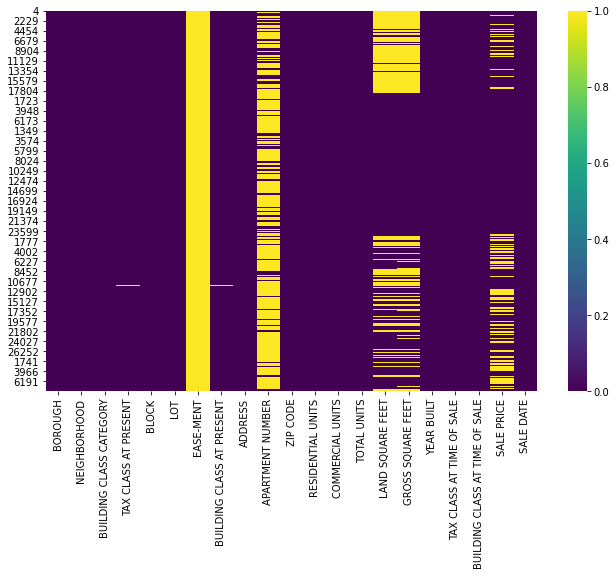

In [8]:
plt.figure(figsize=(11, 7))
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

#### Som vi ser inneholder en del data points store mengder NaN-verdier. <br> Vi har også andre data points som vi føler ikke er relevante for vår target feature
Derfor velger vi å fjerne følgende data points fra vår DataFrame: 

--- 
- **Ease-ment**
    - Består av kun nullverdier   
 
 
- **Apartment number**
    - Store mengder av verdiene er NaN og vi mener det heller ikke er relevant for target feature. 
    

- **Lot**
    - Sier om hvor mye land som blir solgt, men det gjør også land square feet og gross square feet. Ikke nødvendig å ta med


- **Block**
    - Det er bare nummeret på blokken og har lite å si for target feature
--- 

In [9]:
# Fjerner irrelevante data points fra datasett

del df["EASE-MENT"]  
del df["APARTMENT NUMBER"]
del df["LOT"]
del df["BLOCK"]

# Kan muligens fjernes: 

# del df["NEIGHBORHOOD"]
# del df["BUILDING CLASS CATEGORY"]
# del df["TAX CLASS AT PRESENT"]
# del df["ADDRESS"]
# del df["BUILDING CLASS AT TIME OF SALE"]
# del df["SALE DATE"]
# del df["BUILDING CLASS AT PRESENT"]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            83810 non-null  object
 4   BUILDING CLASS AT PRESENT       83810 non-null  object
 5   ADDRESS                         84548 non-null  object
 6   ZIP CODE                        84548 non-null  int64 
 7   RESIDENTIAL UNITS               84548 non-null  int64 
 8   COMMERCIAL UNITS                84548 non-null  int64 
 9   TOTAL UNITS                     84548 non-null  int64 
 10  LAND SQUARE FEET                58296 non-null  object
 11  GROSS SQUARE FEET               56936 non-null  object
 12  YEAR BUILT                      84548 non-null 

#### Det neste steget er å endre alle relevante data points til numeriske verdier så datasettet er optimalisert for modellene våre.
- Nullverdier kan gjøres om til **median** (løsning 1) eller **droppes** (løsning 2)
- For salgsdato vil kun **årstall** være tilstrekkelig
- Etc.
---

Her får vi hentet ut statistiker på kolonner som inneholder tallverdier. 
Dette er nyttig da vi kan bruke median for enkelte nullverdier, f.eks. Sale Price og Square Feet

In [11]:
df.describe()

BOROUGH      ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
count  84548.000000  84548.000000       84548.000000      84548.000000   
mean       2.998758  10731.991614           2.025264          0.193559   
std        1.289790   1290.879147          16.721037          8.713183   
min        1.000000      0.000000           0.000000          0.000000   
25%        2.000000  10305.000000           0.000000          0.000000   
50%        3.000000  11209.000000           1.000000          0.000000   
75%        4.000000  11357.000000           2.000000          0.000000   
max        5.000000  11694.000000        1844.000000       2261.000000   

        TOTAL UNITS    YEAR BUILT  TAX CLASS AT TIME OF SALE  
count  84548.000000  84548.000000               84548.000000  
mean       2.249184   1789.322976                   1.657485  
std       18.972584    537.344993                   0.819341  
min        0.000000      0.000000                   1.000000  
25%        1.000000   1920.000000                   1.000000  
50%        1.000000   1940.000000                   2.000000  
75%        2.000000   1965.000000                   2.000000  
max     2261.000000   2017.000000                   4.000000

# <span style='background:black'> <span style='color:yellow'> Løsning 1 </span> 
Her bytter vi ut nullverdiene til median, eller "mean" fra tabellen ovenfor. 
Vi konverterer også datatypen på disse pointsene til int.

In [12]:
columns = ["SALE PRICE", "LAND SQUARE FEET", "GROSS SQUARE FEET"] # Her bytter vi ut NaN med median ("mean")

for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(value=df[col].mean())
        
        df[col] = df[col].astype(int)

In [13]:
df.head(5)

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
5        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
7        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
8        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT                 ADDRESS  \
4                   2A                        C2            153 AVENUE B   
5                    2                        C7   234 EAST 4TH   STREET   
6                    2                        C7   197 EAST 3RD   STREET   
7                   2B                        C4     154 EAST 7TH STREET   
8                   2A                        C2  301 EAST 10TH   STREET   

   ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
4     10009                  5                 0            5   
5     10009                 28                 3           31   
6     10009                 16                 1           17   
7     10009                 10                 0           10   
8     10009                  6                 0            6   

   LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
4              1633               6440        1900                          2   
5              4616              18690        1900                          2   
6              2212               7803        1900                          2   
7              2272               6794        1913                          2   
8              2369               4615        1900                          2   

  BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
4                             C2     6625000  2017-07-19 00:00:00  
5                             C7     1276456  2016-12-14 00:00:00  
6                             C7     1276456  2016-12-09 00:00:00  
7                             C4     3936272  2016-09-23 00:00:00  
8                             C2     8000000  2016-11-17 00:00:00

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 4 to 8413
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            83810 non-null  object
 4   BUILDING CLASS AT PRESENT       83810 non-null  object
 5   ADDRESS                         84548 non-null  object
 6   ZIP CODE                        84548 non-null  int64 
 7   RESIDENTIAL UNITS               84548 non-null  int64 
 8   COMMERCIAL UNITS                84548 non-null  int64 
 9   TOTAL UNITS                     84548 non-null  int64 
 10  LAND SQUARE FEET                84548 non-null  int64 
 11  GROSS SQUARE FEET               84548 non-null  int64 
 12  YEAR BUILT                      84548 non-null 

# <span style='background:black'> <span style='color:yellow'> Løsning 2 </span> 

dropper alle rader med nullverdier. Vil redusere datasettet en del, men usikker på om det vil påvirke negativt. 


df = df.dropna() 

# Model 1: KNN

In [15]:
# code

# Model 2: Decision Trees

In [16]:
# code

# Model 3 Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

#### Kopierer datasett for modell 

In [18]:
df3 = df.copy()

#### Correlation_matrix for å se hvilke data som har høyest korrelasjon mellom seg. 

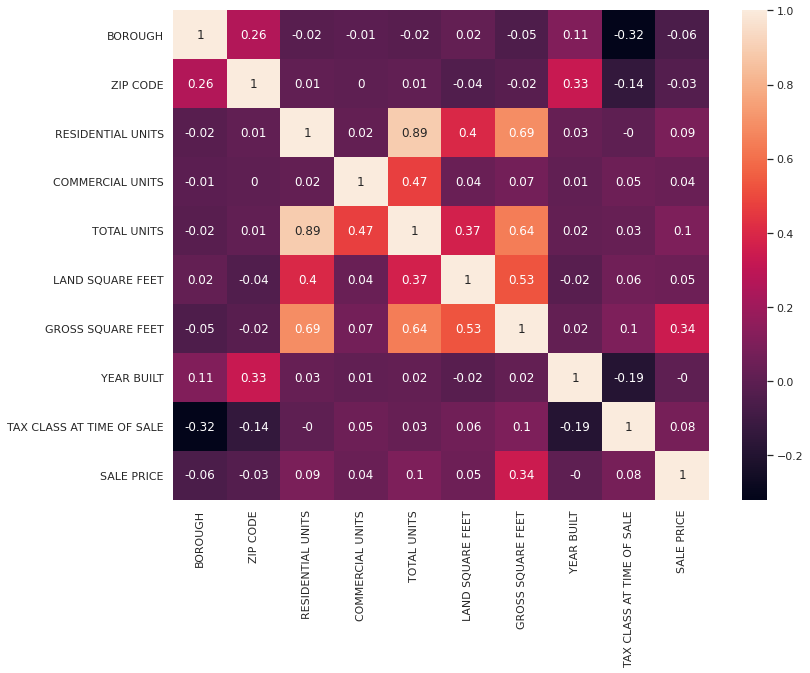

In [19]:
correlation_matrix = df3.corr().round(2) # Regner korrelasjon og runder av til 2 desimaler

sns.set(rc={"figure.figsize":(12,9)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#### Her ser vi følgende: 
* Sale Price har : 
    - høyest positiv korrelasjon med Gross Square Feet
    - lavest negativ korrelasjon med Borough


* Total Units og Residental Units har veldig høy positiv korrelasjon 


* Gross Square Feet og Residental/Total Units har høy positiv korrelasjon


* Tax Class og Borough har lavest negativ korrelasjon

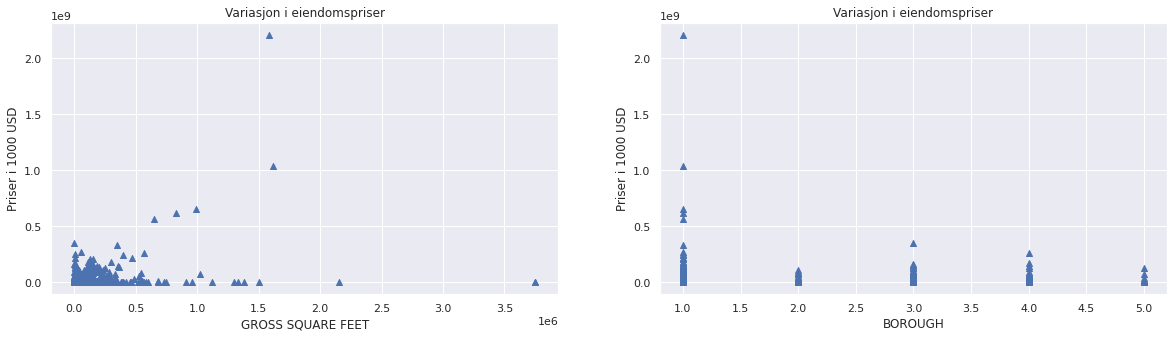

In [20]:
plt.figure(figsize=(20, 5))

input_features = ['GROSS SQUARE FEET', 'BOROUGH']
target = df3['SALE PRICE']

for i, col in enumerate(input_features):
    plt.subplot(1, len(input_features) , i+1)
    x = df3[col]
    y = target
    plt.scatter(x, y, marker='^')
    plt.title("Variasjon i eiendomspriser")
    plt.xlabel(col)
    plt.ylabel('Priser i 1000 USD')

In [21]:
X = df3['GROSS SQUARE FEET'].values.reshape(-1, 1)
y = df3['SALE PRICE'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(67638, 1)
(16910, 1)
(67638, 1)
(16910, 1)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
#Ordinary
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.13
Test set score: -0.09


In [24]:
y_pred = lr.predict(X_test)

actual_vs_predict = pd.DataFrame({'Actual': y_test.flatten(), 'Prediction':y_pred.flatten()})
actual_vs_predict.sample(10)

Actual    Prediction
7970     14000  1.280975e+06
9297   9500000  1.280975e+06
1285   1276456  1.280975e+06
16203   975000  9.471554e+05
9085    385000  1.280975e+06
7543         0  1.682516e+06
11778  5750000  3.222822e+06
2010   6550000  1.280975e+06
13035  1120000  1.280975e+06
16330   680000  7.427925e+05

In [25]:
print('Accuracy: %.2f' % (lr.score(X_test, y_test)*100), '%' )

Accuracy: -8.96 %


# Model 4 : Feedforward Neural Network 1

In [26]:
# code

# Model 5 : Feedforward Neural Network 2

In [27]:
# code